# Assignment-3: Naive Bayes Classifier


**Author:**
AHMED SHMELS MUHE (GE22M009)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("adult.csv")
df.columns = ["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "income"]

df.shape

(32560, 15)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32560 non-null  int64 
 1   workclass       32560 non-null  object
 2   fnlwgt          32560 non-null  int64 
 3   education       32560 non-null  object
 4   education-num   32560 non-null  int64 
 5   marital-status  32560 non-null  object
 6   occupation      32560 non-null  object
 7   relationship    32560 non-null  object
 8   race            32560 non-null  object
 9   sex             32560 non-null  object
 10  capital-gain    32560 non-null  int64 
 11  capital-loss    32560 non-null  int64 
 12  hours-per-week  32560 non-null  int64 
 13  native-country  32560 non-null  object
 14  income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


## Data Engineering & Visualization

In [ ]:
for col in df.columns:
    df[col] = df[col].map(lambda x: x.strip() if type(x) == str else x)
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [ ]:
df = df.replace({"?": np.nan})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32560 non-null  int64 
 1   workclass       30724 non-null  object
 2   fnlwgt          32560 non-null  int64 
 3   education       32560 non-null  object
 4   education-num   32560 non-null  int64 
 5   marital-status  32560 non-null  object
 6   occupation      30717 non-null  object
 7   relationship    32560 non-null  object
 8   race            32560 non-null  object
 9   sex             32560 non-null  object
 10  capital-gain    32560 non-null  int64 
 11  capital-loss    32560 non-null  int64 
 12  hours-per-week  32560 non-null  int64 
 13  native-country  31977 non-null  object
 14  income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
df.shape, df.dropna().shape

((32560, 15), (30161, 15))

In [ ]:
df = df.dropna()
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [ ]:
for col in df.columns:
    unique = df[col].unique()
    print(col, ":\n", unique, end="\n")
    print("num_unique:", len(unique), end="\n\n")

age :
 [50 38 53 28 37 49 52 31 42 30 23 32 34 25 43 40 54 35 59 56 19 39 20 45
 22 48 21 24 57 44 41 29 47 46 36 79 27 18 33 76 55 61 70 64 71 66 51 58
 26 17 60 90 75 65 77 62 63 67 74 72 69 68 73 81 78 88 80 84 83 85 82 86]
num_unique: 72

workclass :
 ['Self-emp-not-inc' 'Private' 'State-gov' 'Federal-gov' 'Local-gov'
 'Self-emp-inc' 'Without-pay']
num_unique: 7

fnlwgt :
 [ 83311 215646 234721 ...  84661 257302 201490]
num_unique: 20262

education :
 ['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 '7th-8th' 'Doctorate' 'Assoc-voc' 'Prof-school' '5th-6th' '10th'
 'Preschool' '12th' '1st-4th']
num_unique: 16

education-num :
 [13  9  7 14  5 10 12  4 16 11 15  3  6  1  8  2]
num_unique: 16

marital-status :
 ['Married-civ-spouse' 'Divorced' 'Married-spouse-absent' 'Never-married'
 'Separated' 'Married-AF-spouse' 'Widowed']
num_unique: 7

occupation :
 ['Exec-managerial' 'Handlers-cleaners' 'Prof-specialty' 'Other-service'
 'Adm-clerical' 'Sales' 'Transport

In [ ]:
for col in ["workclass", "education", "marital-status", "occupation", "relationship", "race", "sex", "native-country"]:
    print(100 * df[col].value_counts() / len(df[col]), end="\n\n")

Private             73.890123
Self-emp-not-inc     8.285534
Local-gov            6.853221
State-gov            4.237260
Self-emp-inc         3.560890
Federal-gov          3.126554
Without-pay          0.046418
Name: workclass, dtype: float64

HS-grad         32.624913
Some-college    22.141176
Bachelors       16.720268
Masters          5.394383
Assoc-voc        4.333411
11th             3.474686
Assoc-acdm       3.342064
10th             2.718743
7th-8th          1.846756
Prof-school      1.797023
9th              1.508571
12th             1.249959
Doctorate        1.243327
5th-6th          0.954876
1st-4th          0.500647
Preschool        0.149199
Name: education, dtype: float64

Married-civ-spouse       46.633069
Never-married            32.243626
Divorced                 13.971685
Separated                 3.113292
Widowed                   2.741952
Married-spouse-absent     1.226750
Married-AF-spouse         0.069626
Name: marital-status, dtype: float64

Prof-specialty       13.3

In [ ]:
values = ["Peru", "Greece", "France", "Ecuador", "Ireland", "Hong", "Cambodia", "Trinadad&Tobago", "Thailand", "Laos", "Yugoslavia", "Outlying-US(Guam-USVI-etc)", "Hungary", "Honduras", "Honduras", "Scotland", "Holand-Netherlands"]
df["native-country"] = df["native-country"].map(lambda x: "other" if x in values else x)
df["native-country"].value_counts()

United-States         27503
Mexico                  610
other                   293
Philippines             188
Germany                 128
Puerto-Rico             109
Canada                  107
India                   100
El-Salvador             100
Cuba                     92
England                  86
Jamaica                  80
South                    71
China                    68
Italy                    68
Dominican-Republic       67
Vietnam                  64
Guatemala                63
Japan                    59
Poland                   56
Columbia                 56
Haiti                    42
Taiwan                   42
Iran                     42
Portugal                 34
Nicaragua                33
Name: native-country, dtype: int64

In [ ]:
values = ["Married-spouse-absent", "Married-AF-spouse"]
df["marital-status"] = df["marital-status"].map(lambda x: "other" if x in values else x)
df["marital-status"].value_counts()

Married-civ-spouse    14065
Never-married          9725
Divorced               4214
Separated               939
Widowed                 827
other                   391
Name: marital-status, dtype: int64

In [ ]:
values = ["5th-6th", "1st-4th", "Preschool"]
df["education"] = df["education"].map(lambda x: "other" if x in values else x)
df["education"].value_counts()

HS-grad         9840
Some-college    6678
Bachelors       5043
Masters         1627
Assoc-voc       1307
11th            1048
Assoc-acdm      1008
10th             820
7th-8th          557
Prof-school      542
other            484
9th              455
12th             377
Doctorate        375
Name: education, dtype: int64

In [ ]:
print(100 * df["income"].value_counts() / len(df["income"]), end="\n\n")

<=50K    75.106926
>50K     24.893074
Name: income, dtype: float64



In [ ]:
def bar_chart(feature, df):
    over = df[df['income'] == ">50K"][feature].value_counts()
    below = df[df['income'] == "<=50K"][feature].value_counts()
    df = pd.DataFrame([over, below])
    df.index = ['Over 50K', 'Below 50K']
    df.plot(kind='bar', stacked=True, figsize=(10, 5), ylabel="Frequency", title=f"Bar chart for Income conditioned over {feature}")

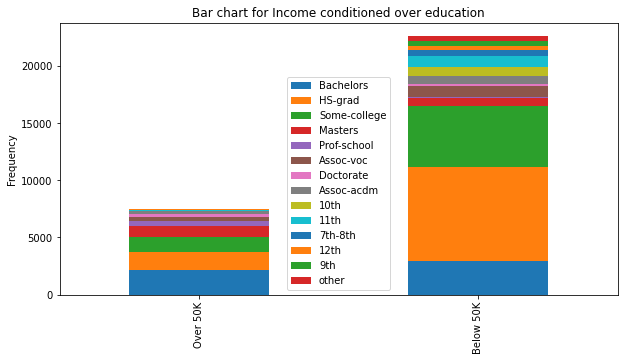

In [ ]:
bar_chart("education", df)

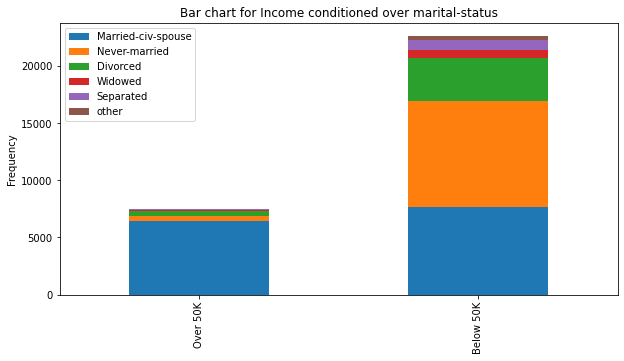

In [ ]:
bar_chart("marital-status", df)

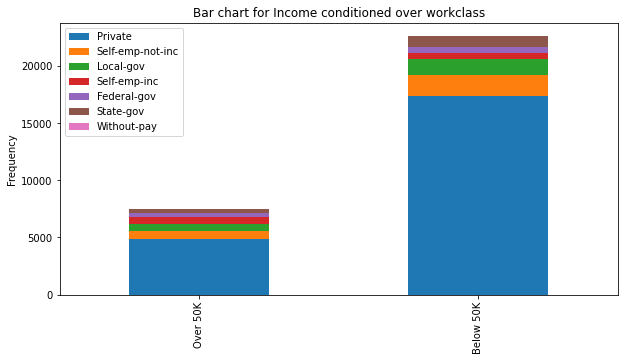

In [ ]:
bar_chart("workclass", df)

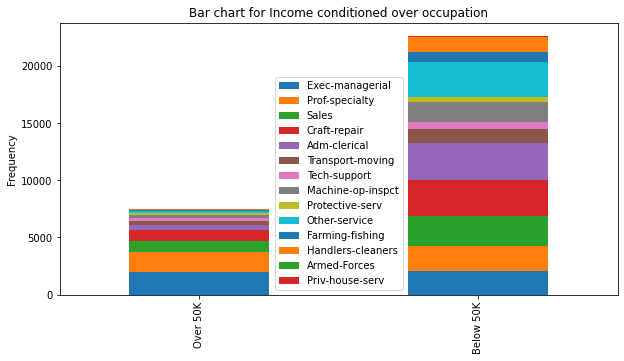

In [ ]:
bar_chart("occupation", df)

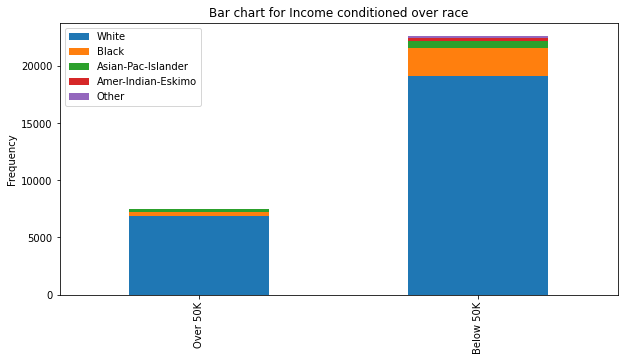

In [ ]:
bar_chart("race", df)

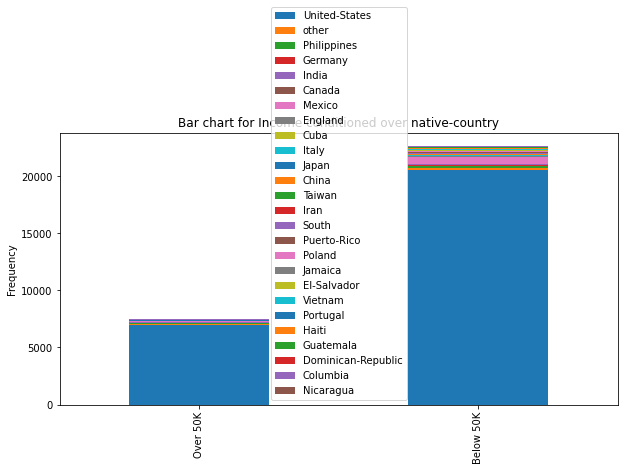

In [ ]:
bar_chart("native-country", df)

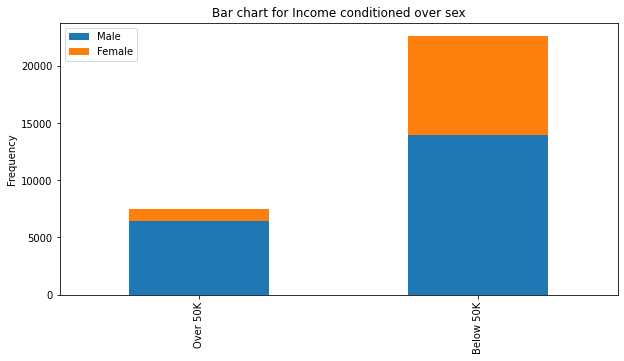

In [ ]:
bar_chart("sex", df)

In [ ]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

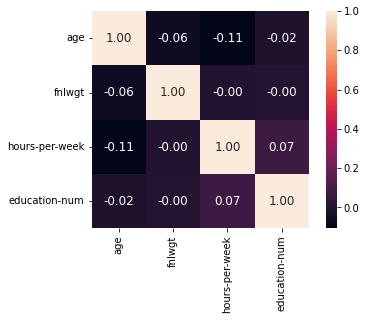

In [ ]:
columns = ["age", "fnlwgt", "hours-per-week", "education-num"]

info = np.corrcoef(df.loc[df["income"] == ">50K", columns].values.T)
sns.heatmap(info, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size':12}, yticklabels=columns, xticklabels=columns)
plt.show()

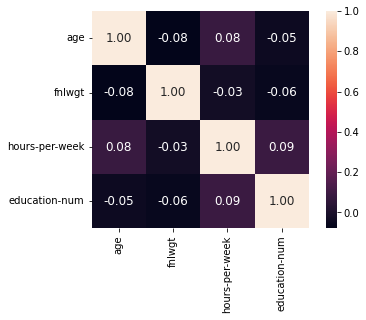

In [ ]:
info = np.corrcoef(df.loc[df["income"] == "<=50K", columns].values.T)
sns.heatmap(info, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size':12}, yticklabels=columns, xticklabels=columns)
plt.show()

In [ ]:
df.drop(["education-num"], inplace=True, axis=1)

In [ ]:
df = pd.get_dummies(df, columns=["workclass", "native-country", "sex", "race", "relationship", "occupation", "marital-status", "education"])
df

,age,fnlwgt,capital-gain,capital-loss,hours-per-week,income,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,...,education_9th,education_Assoc-acdm,education_Assoc-voc,education_Bachelors,education_Doctorate,education_HS-grad,education_Masters,education_Prof-school,education_Some-college,education_other
0,50,83311,0,0,13,<=50K,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,38,215646,0,0,40,<=50K,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
2,53,234721,0,0,40,<=50K,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,28,338409,0,0,40,<=50K,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,37,284582,0,0,40,<=50K,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,257302,0,0,38,<=50K,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
32556,40,154374,0,0,40,>50K,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
32557,58,151910,0,0,40,<=50K,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
32558,22,201490,0,0,20,<=50K,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
df["income"] = df["income"].map(lambda x: 1 if x == ">50K" else 0)
df["income"].unique()

array([0, 1])

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop("income", axis=1)
y = df["income"].values

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
X_train.shape, y_train.shape, X_val.shape, y_val.shape

((24128, 85), (24128,), (6033, 85), (6033,))

In [ ]:
y_train[y_train == 1].shape, y_train[y_train == 0].shape

((6037,), (18091,))

## Model Fitting & Analysis

In [ ]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred = model.predict(X_val)
y_probs = model.predict_proba(X_val)
y_pred, y_probs

(array([0, 0, 0, ..., 0, 0, 1]),
 array([[9.92681588e-01, 7.31841246e-03],
        [9.74016223e-01, 2.59837770e-02],
        [9.94292816e-01, 5.70718361e-03],
        ...,
        [9.98904562e-01, 1.09543839e-03],
        [9.79265653e-01, 2.07343470e-02],
        [7.24520315e-09, 9.99999993e-01]]))

In [ ]:
accuracy = np.mean(y_pred == y_val) * 100
accuracy

79.36350074589757

In [ ]:
from sklearn.metrics import confusion_matrix

pd.DataFrame(confusion_matrix(y_val, y_pred), index=["Actual Positive", "Actual Negative"], columns=["Predicted Positive", "Predicted Negative"])

,Predicted Positive,Predicted Negative
Actual Positive,4335,227
Actual Negative,1018,453


/Users/vasudevgupta/miniconda3/envs/gsoc/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


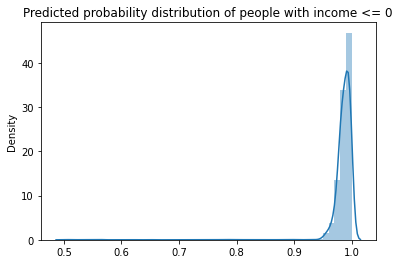

In [ ]:
sns.distplot(y_probs[y_pred == 0, 0])
plt.title("Predicted probability distribution of people with income <= 0")
plt.show()

/Users/vasudevgupta/miniconda3/envs/gsoc/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


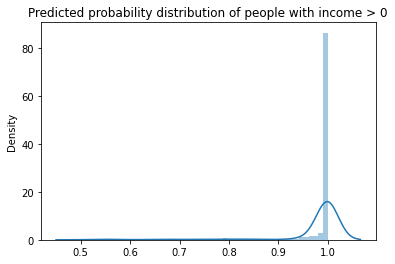

In [ ]:
sns.distplot(y_probs[y_pred == 1, 1])
plt.title("Predicted probability distribution of people with income > 0")
plt.show()

In [ ]:
tmp = y_probs[y_pred == 1, 1]
len(tmp[tmp >= 0.9]) / len(tmp)

0.925

In [ ]:
tmp = y_probs[y_pred == 0, 0]
len(tmp[tmp >= 0.9]) / len(tmp)

0.9925275546422567